In [1]:
import numpy as np
import pandas as pd

import re

data = pd.read_csv('/kaggle/input/ys19-2023-assignment-1/train_set.csv')

pd.set_option('max_colwidth', None)
data.head()

print(data['Text'])

0                                     #απολυμανση_κοριοι #απεντομωση_κοριος #απολυμανσεις #κοριος#Alphatv #Την Κυριακη  #Κουλης #Τσιπρα #F-35 Κοριοί απολύμανση - Καταπολέμηση κοριών - Απεντόμωση για κοριούς https://t.co/Wly4WIUAxT
1                                                                                                                 Έξι νέες επιστολές για τη Μακεδονία «καίνε» τη ΝΔ - Ο Μητσοτάκης γνώριζε και δίχασε το έθνος https://t.co/g4alBWyKdW
2                                                                                                                                                                  Ισχυρό ΚΚΕ, δύναμη του λαού στη Βουλή και στους καθημερινούς αγώνες
3                                                                                                              @five2nds @anthi7vas Μνημονιακότατο το #ΜεΡΑ25  #Εκλογες_2019 #8iouliou #epomeni_mera #ΤΩΡΑ_ΚΚΕ https://t.co/Mw69TIaHLZ
4                                                                           

In [2]:
pip install greek-stemmer-pos

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.0/229.0 kB 7.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


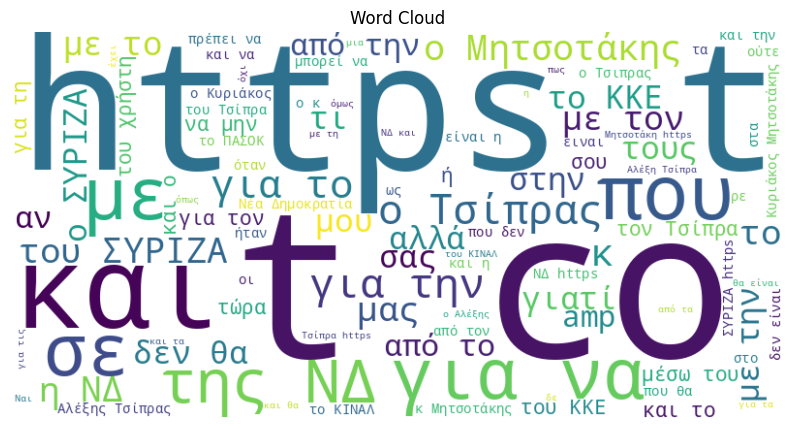

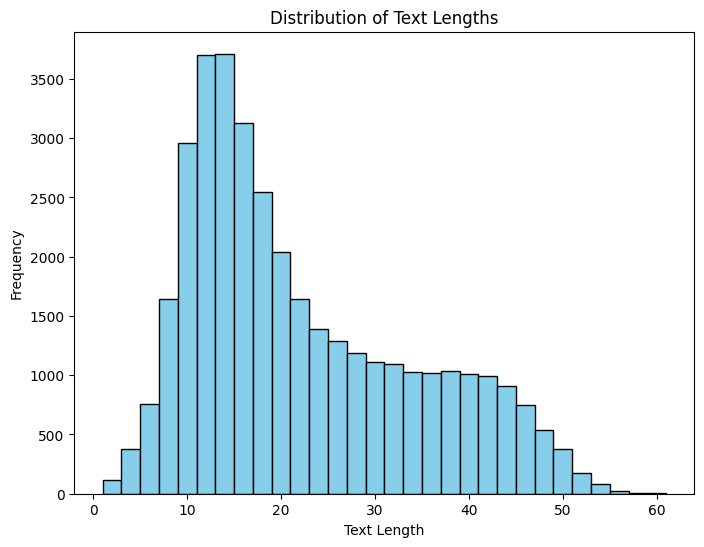

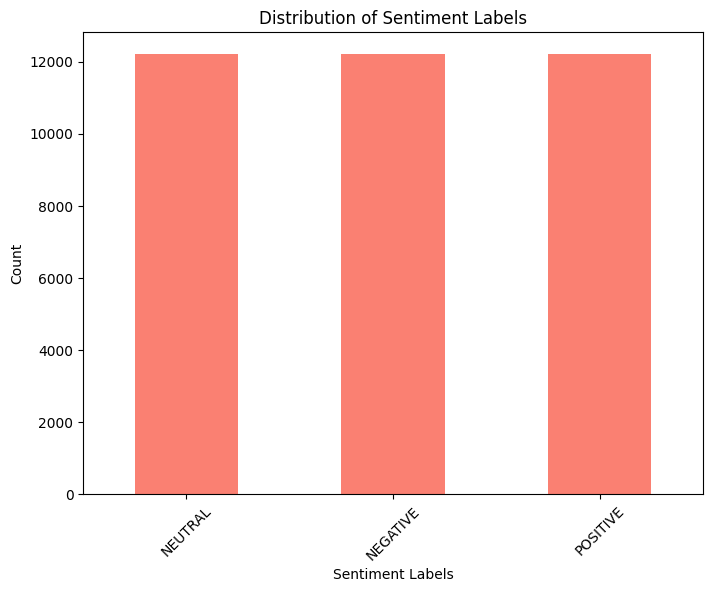

In [3]:
##################### DATA ANALYSIS #######################


###################### Word Cloud #########################
from wordcloud import WordCloud
import matplotlib.pyplot as plt

combined_text = ' '.join(data['Text'].astype(str).tolist())

wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(combined_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show() 

################ TEXT LENGTH HISTOGRAM ################

text_lengths = data['Text'].apply(lambda x: len(x.split())) 

plt.figure(figsize=(8, 6))
plt.hist(text_lengths, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Distribution of Text Lengths')
plt.show()


######### BAR CHART FOR SENTIMENT #####################
sentiment_counts = data['Sentiment'].value_counts()

plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color='salmon')
plt.xlabel('Sentiment Labels')
plt.ylabel('Count')
plt.title('Distribution of Sentiment Labels')
plt.xticks(rotation=45)
plt.show()



In [4]:
##################  Libraries  #######################
import re

from unidecode import unidecode

import string
import unicodedata

import spacy

from greek_stemmer import stemmer

pd.set_option('max_colwidth', None)
data.head()

##################  Functions  #######################

#Removing mentions hashtags and links
def remove_mentions_hashtags_links(text):
    return ' '.join(word for word in text.split() if not (word.startswith('@') or word.startswith('#') or word.startswith('https://')))

#Converting capital to lower case letters
def clean_greek_text(text):
    cleaned_text = unidecode(text).lower()
    return cleaned_text

#Removing accends
def remove_accents(text):
    return ''.join(char for char in unicodedata.normalize('NFD', text) if not unicodedata.combining(char))

#Removing stop words
def remove_stopwords(text):
    stopwords = [
        'αλλά', 'αν', 'αντί', 'από', 'αυτά', 'αυτές', 'αυτή', 'αυτό', 'αυτοί', 'αυτός', 
        'αυτούς', 'αυτών', 'για', 'δεν', 'εάν', 'ένα', 'έναν', 'ένας', 'έναντι', 'ένεκα', 
        'έτσι', 'έχει', 'ή', 'ίσως', 'ακόμα', 'αλλά', 'αλλιώς', 'αν', 'αντί', 
        'από', 'αφού', 'αυτά', 'αυτές', 'αυτή', 'αυτό', 'αυτοί', 'αυτός', 'αυτού', 'αυτούς', 
        'αυτών', 'για', 'γιατί', 'γιατί', 'δε', 'δεν', 'δηλαδή', 'εάν', 'είμαι', 
        'είμαστε', 'είναι', 'είσαι', 'είστε', 'εκεί', 'εκτός', 'ένα', 'ένας','έτσι', 'έχει', 'έχεις', 'ή', 'ίσως', 'ήδη', 'ήμαρτον', 'ίσως', 'ίσως', 
        'ήταν', 'ίταν', 'ακόμα', 'ακριβώς', 'αλίμονο', 'αλλά', 'αλλιώς', 'αν', 'ανά', 
        'ανάμεσα', 'ανάμεσα', 'αναμεταξύ', 'αναμεταξύ', 'αντί', 'αντίθετα','από', 'απ', 'από', 'γι', 'για', 'δι', 'δια', 'εις', 'εκ', 'ένα', 'έναν', 'ένας', 'ενός', 
    'εξ', 'επ', 'επί', 'καθ', 'και', 'κατ', 'κατά', 'με', 'μέσα', 'μια', 'μία', 'μιά', 'με', 'ότι',
    'μιαν', 'μιας', 'περί', 'σε', 'στα', 'στη', 'στην', 'στις', 'στο', 'στον', 'στους', 'πιο', 'σου', 'ο', 'η',
    'τα', 'τη', 'την', 'της', 'τις', 'το', 'τον', 'του', 'τους', 'των', 'υπό']

    words = text.split()
    
    cleaned_words = [word for word in words if word not in stopwords]
    cleaned_text = ' '.join(cleaned_words)
    
    return cleaned_text

#Removing punctuation
def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    cleaned_text = text.translate(translator)
    return cleaned_text


#Stemming

def stemming(text):
    words = text.split()
    st_words = [stemmer.stem_word(word,"VBG") for word in words]
    st_text = ' '.join(st_words)
    return st_text
####################  Applications  #######################


data['Text'] = data['Text'].apply(remove_mentions_hashtags_links)
data['Text'] = data['Text'].apply(remove_stopwords)
data['Text'] = data['Text'].apply(remove_accents)
data['Text'] = data['Text'].apply(remove_punctuation)
data['Text'] = data['Text'].apply(stemming)
data['Text'] = data['Text'].str.lower()

print(data['Text'])

0                                                                                               κυριακ κορι απολυμανς καταπολεμης κορι απεντομως κορι
1                                                                                       εξι νε επιστολ μακεδονι «καινε» νδ  μητσοτακ γνωριζ διχας εθν
2                                                                                                              ισχυρ κκε δυναμ λα βουλ καθημεριν αγων
3                                                                                                                                           μνημονιακ
4                                                                                                               αυτ που συγκλονιστικ ψυχασθενει τσιπρ
                                                                             ...                                                                     
36625     κουλ μητσοτακ λε ψεματαδ αδειας κανεν μπαμπ παπαδημητριου μπαμπ προετοιμαζ που ερχετα κουλ

In [5]:
#################### Vectorisation ######################

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Experiment by merging the two column (Text and Party) into one
#data['New_Text'] = data['Text'] + data['Party']
#data.drop(['Text', 'Party'], axis=1, inplace=True)


# Initialize Vectorizers
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(data['Text'])  #Got better results
print(X)
# Experiments testing who vectorizer is better
#vectorizer = CountVectorizer()
#X = vectorizer.fit_transform(data['Text'])


# Experiment by merging the two column (Text and Party) into one
#X = tfidf_vectorizer.fit_transform(data['New_Text'])  #Got better results

# Label Encoding because Sentiment labels are not numerical values
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(data['Sentiment']) 


  (0, 6849)	0.2719255349088378
  (0, 18576)	0.24669423135293628
  (0, 7213)	0.2543225709295562
  (0, 20029)	0.8880577470850972
  (0, 20884)	0.10895837480271289
  (1, 12826)	0.34500446423327846
  (1, 12150)	0.40740791098690127
  (1, 10477)	0.3095776971632396
  (1, 23125)	0.12763102509424593
  (1, 24518)	0.1457945333777558
  (1, 17598)	0.4699688765887194
  (1, 22025)	0.2763247441311907
  (1, 15127)	0.28135132393863915
  (1, 24649)	0.23134750459095665
  (1, 14429)	0.3894872193928049
  (2, 4213)	0.411068904534304
  (2, 17516)	0.4937278073388949
  (2, 9415)	0.36331271712865554
  (2, 21067)	0.3160165748578173
  (2, 12409)	0.4004071818997952
  (2, 19307)	0.2576873716751412
  (2, 17361)	0.3586975176039602
  (3, 23477)	1.0
  (4, 35843)	0.17939761213003447
  (4, 39151)	0.7035806241016658
  :	:
  (36628, 16985)	0.2845565256075535
  (36628, 25842)	0.2845565256075535
  (36628, 22254)	0.24388118806888348
  (36628, 24386)	0.49867848341907745
  (36628, 34182)	0.22358076093620544
  (36628, 21603)	0.278

In [6]:
# TESTING LOGISTIC REGRESSION TOLLERANCE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

for t in [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9]:
  model = LogisticRegression(tol=t, C=1.0, max_iter=500)
  scores = cross_val_score(model,X, Y, cv=5, n_jobs=-1 )
  print(f"for tollerance = {t}")
  print(scores.mean())

    
# TESTING LOGISTIC REGRESSION INVERSE OF REGULARISATION STRENGTH

for c in [x * 0.1 for x in range(1, 10, 1)]:
  model = LogisticRegression(tol=0.1, C=c, max_iter=10000)
  scores = cross_val_score(model,X, Y, cv=5, n_jobs=-1 )
  print(f"for  Inverse of regularization strength = {c}")
  print(scores.mean())
    
    
# TESTING LOGISTIC REGRESSION SOLVER PARAMETER
for sol in ['newton-cg', 'lbfgs', 'sag', 'saga']:
    model = LogisticRegression(tol=0.1, C=10, solver=sol, max_iter=10000)
    scores = cross_val_score(model, X, Y, cv=5, n_jobs=-1)
    print(f"for solver = {sol}")
    print(scores.mean())
    
    
# TESTING LOGISTIC REGRESSION MAX ITERRATIONS

for iter in [1000,10000,100000,1000000]:
  model = LogisticRegression(tol=0.1, C=10, max_iter=iter)
  scores = cross_val_score(model,X, Y, cv=5, n_jobs=-1 )
  print(f"for  iterrations = {iter}")
  print(scores.mean())

for tollerance = 0.1
0.3815724815724816
for tollerance = 0.01
0.3816543816543817
for tollerance = 0.001
0.3816543816543817
for tollerance = 0.0001
0.3816543816543817
for tollerance = 1e-05
0.3816543816543817
for tollerance = 1e-06
0.3816543816543817
for tollerance = 1e-07
0.3816543816543817
for tollerance = 1e-08
0.3816543816543817
for tollerance = 1e-09
0.3816543816543817
for  Inverse of regularization strength = 0.1
0.38430248430248437
for  Inverse of regularization strength = 0.2
0.3836745836745837
for  Inverse of regularization strength = 0.30000000000000004
0.3835107835107835
for  Inverse of regularization strength = 0.4
0.3836472836472836
for  Inverse of regularization strength = 0.5
0.3837564837564838
for  Inverse of regularization strength = 0.6000000000000001
0.38288288288288286
for  Inverse of regularization strength = 0.7000000000000001
0.3822276822276822
for  Inverse of regularization strength = 0.8
0.3819000819000819
for  Inverse of regularization strength = 0.9
0.38149058

F1 Score (Training): {f1_train:.4f}
F1 Score (Validation): {f1_val:.4f}
F1 Score (Training): {f1_train:.4f}
F1 Score (Validation): {f1_val:.4f}
F1 Score (Training): {f1_train:.4f}
F1 Score (Validation): {f1_val:.4f}
F1 Score (Training): {f1_train:.4f}
F1 Score (Validation): {f1_val:.4f}
F1 Score (Training): {f1_train:.4f}
F1 Score (Validation): {f1_val:.4f}
F1 Score (Training): {f1_train:.4f}
F1 Score (Validation): {f1_val:.4f}
F1 Score (Training): {f1_train:.4f}
F1 Score (Validation): {f1_val:.4f}
F1 Score (Training): {f1_train:.4f}
F1 Score (Validation): {f1_val:.4f}
F1 Score (Training): {f1_train:.4f}
F1 Score (Validation): {f1_val:.4f}
F1 Score (Training): {f1_train:.4f}
F1 Score (Validation): {f1_val:.4f}


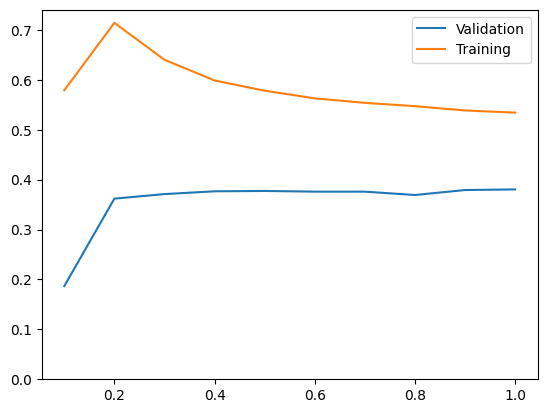

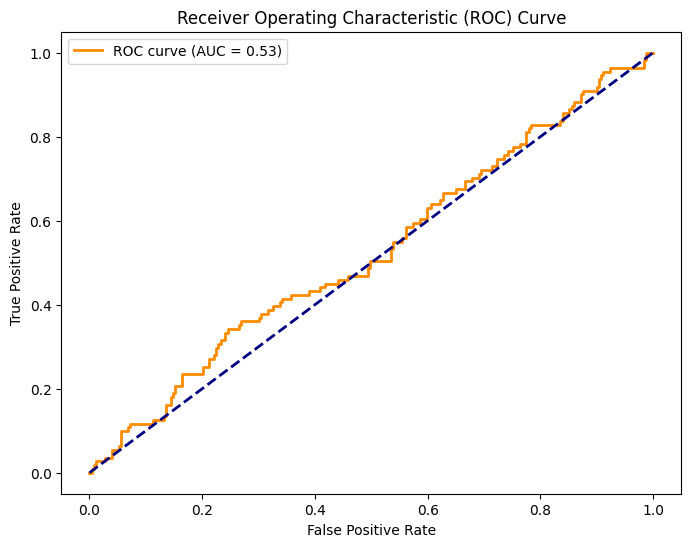

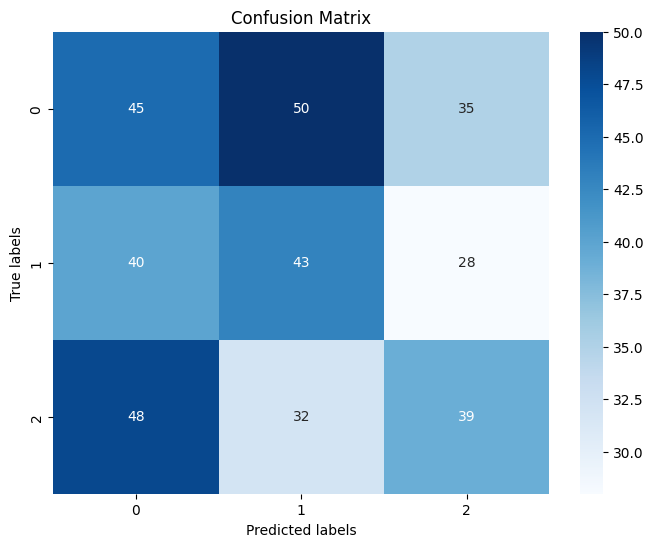

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

list_f1_val=[]
list_f1_train=[]
list_sample_size=[]


#################### Logistic Regression - Trainnig example ########################
for times in range(10):
  # training
  #
    # Split the data into training, validation, and testing sets
    X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size = 1 - (times * 0.1 + 0.001), random_state = 42)
    X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size = 1 - (times * 0.1 + 0.001), random_state = 42)

    # Train the model (Logistic Regression as an example)
    model = LogisticRegression(tol=0.01, C=0.1, solver='saga', max_iter=1000)
    model.fit(X_train, Y_train)

    # Predict on the training set and calculate F1 Score
    Y_pred_train = model.predict(X_train)
    f1_train = f1_score(Y_train, Y_pred_train, average='macro')  

    # Predict on the validation set and calculate F1 Score
    Y_pred_val = model.predict(X_val)
    f1_val = f1_score(Y_val, Y_pred_val, average='macro') 

    print("F1 Score (Training): {f1_train:.4f}")
    print("F1 Score (Validation): {f1_val:.4f}")
    list_f1_val.append(f1_val)
    list_f1_train.append(f1_train)
    list_sample_size.append((times * 0.1 + 0.1))
    

################## Learning Curve ###################
    
plt.plot(list_sample_size, list_f1_val)
plt.plot(list_sample_size, list_f1_train)

plt.ylim(ymin=0)
plt.legend(["Validation", "Training"])


################## ROC Curve ###################

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

Y_prob = model.predict_proba(X_test)

Y_test_binarized = label_binarize(Y_test, classes=np.unique(Y_test))

fpr, tpr, _ = roc_curve(Y_test_binarized[:, 1], Y_prob[:, 1])  # Assuming binary classification (ROC for class 1)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

########################### Confusion matrix ###################

from sklearn.metrics import confusion_matrix
import seaborn as sns

Y_pred = model.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [8]:
################### Train final model ###################

data_test = pd.read_csv('/kaggle/input/ys19-2023-assignment-1/test_set.csv')
pd.set_option('max_colwidth', None)
data_test.head()

data_test['Text'] = data_test['Text'].apply(remove_mentions_hashtags_links)
data_test['Text'] = data_test['Text'].apply(remove_stopwords)
data_test['Text'] = data_test['Text'].apply(remove_accents)
data_test['Text'] = data_test['Text'].apply(remove_punctuation)
data_test['Text'] = data_test['Text'].apply(stemming)
data_test['Text'] = data_test['Text'].str.lower()

combined_text = pd.concat([data['Text'], data_test['Text']], axis=0)

# Refitting the TF-IDF vectorizer on the combined data
tfidf_vectorizer = TfidfVectorizer()
X_combined = tfidf_vectorizer.fit_transform(combined_text)

# Split X_train into two sets: X_train_10470 and X_remaining because test_set has 10470 samples
X_train_10470, X_remaining = train_test_split(X_combined, train_size=10470, random_state=42)
# Split Y for the same reason
Y_10470, Y_remaining = train_test_split(Y, train_size=10470, random_state=42)


# Fiting the Logistic Regression model on the 10470 samples
model_final = LogisticRegression(tol=0.01, C=0.1, solver='saga', max_iter=1000)
model_final.fit(X_train_10470, np.ravel(Y_10470))


X_test = tfidf_vectorizer.transform(data_test['Text'])

predictions = model_final.predict(X_test)

# Inverse convertion of the numeric predictions back to original labels
predicted_labels = label_encoder.inverse_transform(predictions)

data_test['Predicted'] = predicted_labels

# Removing Text and Party columns and then rename New_ID to Id
data_test.drop(['Text', 'Party'], axis=1, inplace=True)
data_test.rename(columns={'New_ID': 'Id'}, inplace=True)

# Final submission
print(data_test)
data_test.to_csv('submission.csv', index=False)

          Id Predicted
0          1  POSITIVE
1          2  NEGATIVE
2          3   NEUTRAL
3          4  POSITIVE
4          5  NEGATIVE
...      ...       ...
10465  10466  NEGATIVE
10466  10467  NEGATIVE
10467  10468  NEGATIVE
10468  10469   NEUTRAL
10469  10470  NEGATIVE

[10470 rows x 2 columns]
